### EXPLORATORY DATA ANALYSIS EDA

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Reading the data

In [2]:
df = pd.read_csv('Stratos_test_task_spreads.csv')
df['quote_hour'] = pd.to_datetime(df['quote_hour'], format='%m/%d/%Y %H:%M')
df.set_index('quote_hour', inplace=True)
df.head()

,symbol,avg_spread
quote_hour,,
2024-02-12 00:00:00,US30,4.8
2024-02-12 01:00:00,US30,4.8
2024-02-12 02:00:00,US30,4.8
2024-02-12 03:00:00,US30,4.8
2024-02-12 04:00:00,US30,4.8


#### Data types and counts

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2024-02-12 00:00:00 to 2024-02-25 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      480 non-null    object 
 1   avg_spread  478 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB
None


#### Dataset - dates range, traded symbols and missing values

In [4]:
print('Start date: ', df.index.max())
print('End date: ', df.index.min())

Start date:  2024-02-25 23:00:00
End date:  2024-02-12 00:00:00


In [5]:
symbols = list(df['symbol'].unique())
print('Traded symbols:' , symbols)

Traded symbols: ['US30', 'USD/JPY']


In [6]:
print('Number of missing values per column: ')
df.isnull().sum()

Number of missing values per column: 


symbol        0
avg_spread    2
dtype: int64

In [7]:
print('Remove missing values and check values again: ')
df = df.dropna()
df.isnull().sum()

Remove missing values and check values again: 


symbol        0
avg_spread    0
dtype: int64

#### 1. Plot average spread for the two symbols 

c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


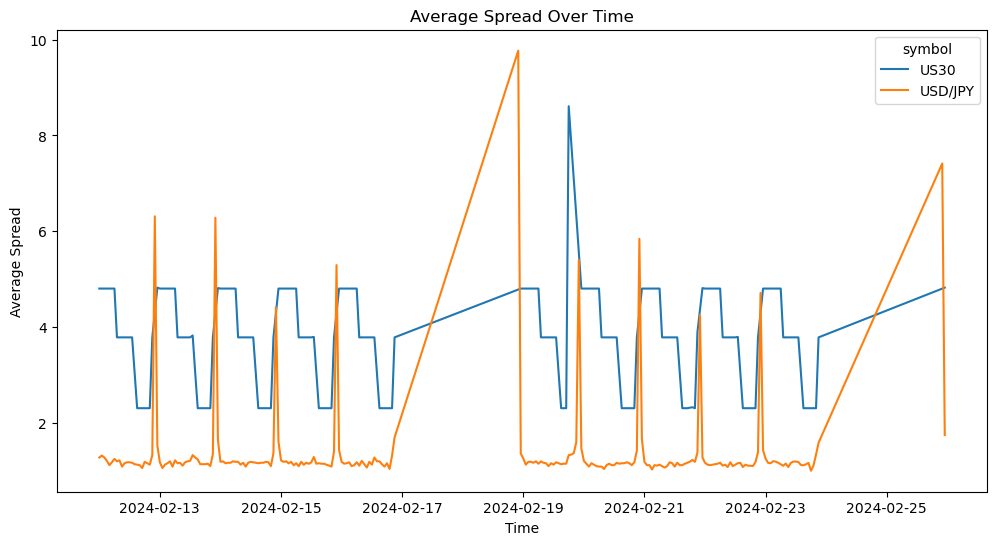

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='avg_spread', hue='symbol', data=df)
plt.title('Average Spread Over Time')
plt.xlabel('Time')
plt.ylabel('Average Spread')
plt.show()

#### Observations:

- spreads tend to increase in the final hours of the day
- spreads widen over the weekends 
- USD/JPY exhibits considerablly smaller spread compared to the US30 

##### 2. Daily average spread for each symbol - average spread for each day 

c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


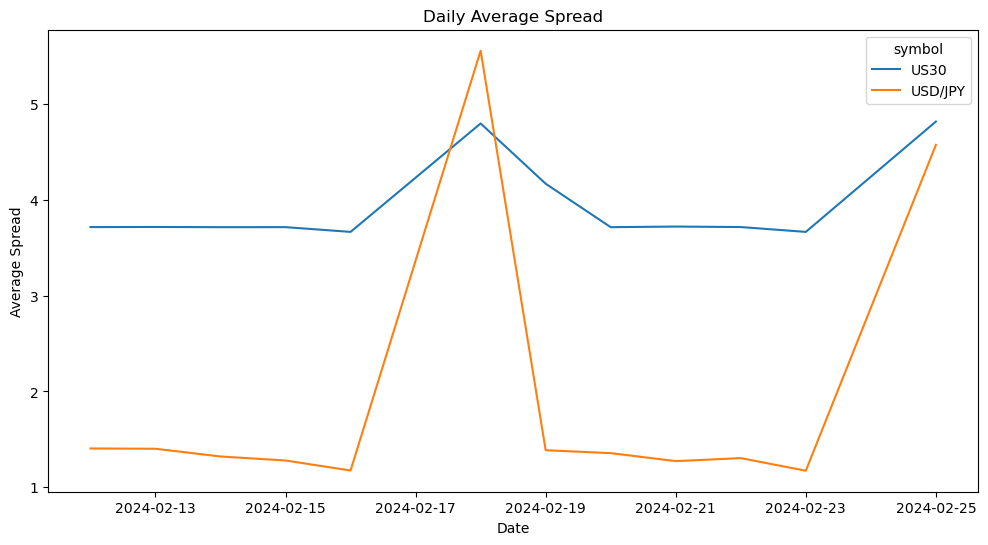

In [9]:

daily_avg_spread = df.groupby([pd.Grouper(freq='D'), 'symbol'])['avg_spread'].mean().reset_index()

# Visualize daily average spread for each symbol
plt.figure(figsize=(12, 6))
sns.lineplot(x='quote_hour', y='avg_spread', hue='symbol', data=daily_avg_spread)
plt.title('Daily Average Spread')
plt.xlabel('Date')
plt.ylabel('Average Spread')
plt.show()

#### Observations: 

- daily average spread per day tends to be smaller for the USD/JPY
- during the weekends, the spread for USD/JPY increases considerably more compared to the increase in US30 which holds more steady 

#### 3. Spread by Hour of the Day

c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


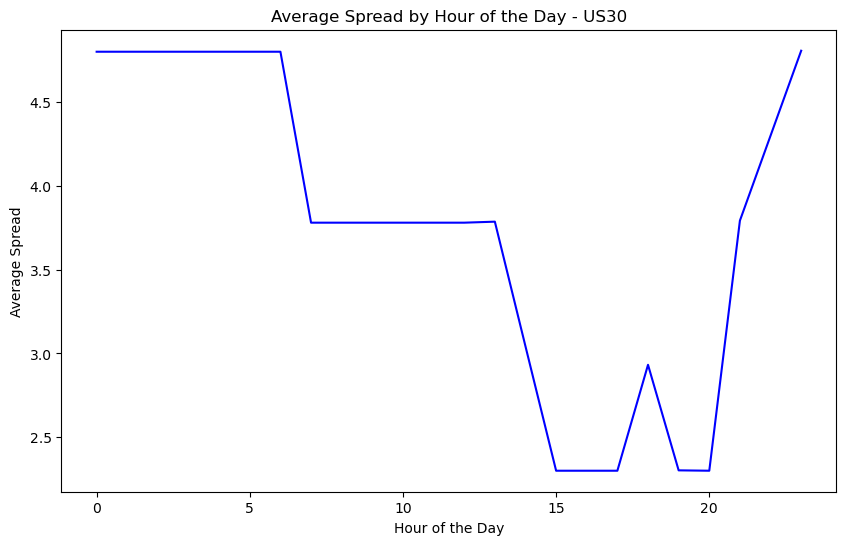

In [10]:
ticker = symbols[0]
df1 = df[df['symbol'] == ticker]

hourly_avg_spread_by_hour = df1.groupby(df1.index.hour)['avg_spread'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_spread_by_hour.index, y=hourly_avg_spread_by_hour.values, color = 'blue')
plt.title(f'Average Spread by Hour of the Day - {ticker}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spread')
plt.show()

c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


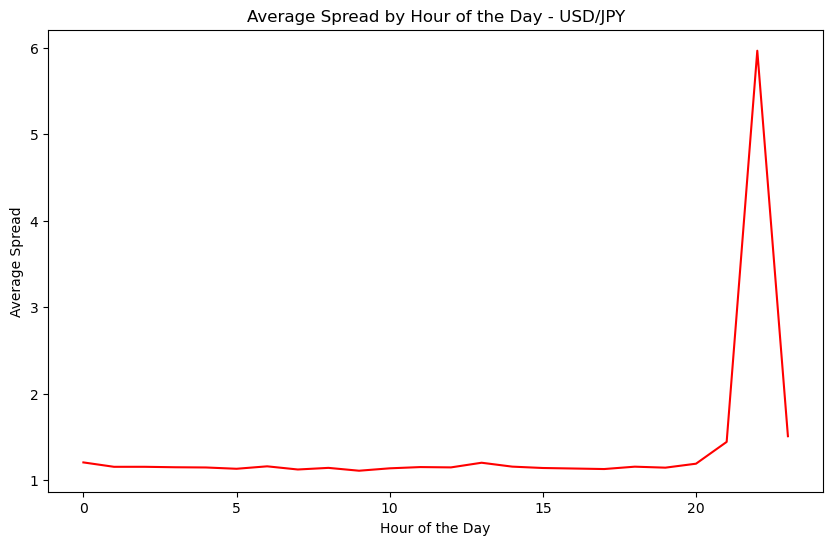

In [11]:
ticker = symbols[1]
df1 = df[df['symbol'] == ticker]

hourly_avg_spread_by_hour = df1.groupby(df1.index.hour)['avg_spread'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_spread_by_hour.index, y=hourly_avg_spread_by_hour.values, color = 'r')
plt.title(f'Average Spread by Hour of the Day - {ticker}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spread')
plt.show()

#### Observations

-  USD/JPY maintains a steady spread between 1 and 1.5 throught the hours of the day but from 20:00 oçlock the spread spikes well above 5 
- the spread for US30 tends to change frequently during the day, it is well above 3.5 in the early hours of the day. From 15:00 o clock the spread constantly improves, and becomes smaller until 20:00 o'clock when the spread increases (likely due to market close)

#### 4. Spread Volatility 

c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\.conda\envs\pytorch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


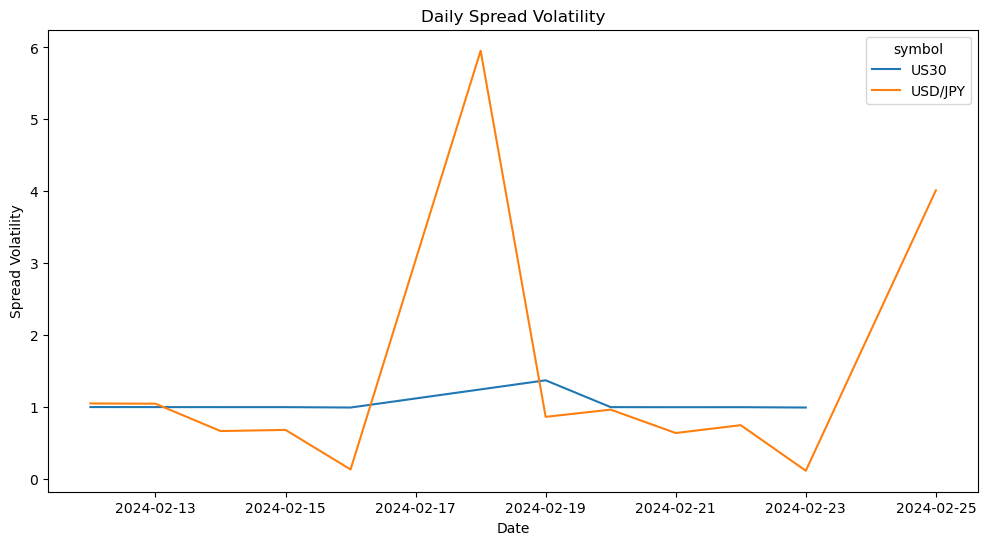

In [12]:
# Calculate daily spread volatility for each symbol
daily_spread_volatility = df.groupby([pd.Grouper(freq='D'), 'symbol'])['avg_spread'].std().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='quote_hour', y='avg_spread', hue='symbol', data=daily_spread_volatility)
plt.title('Daily Spread Volatility')
plt.xlabel('Date')
plt.ylabel('Spread Volatility')
plt.show()

#### Observations:

- Daily spread volatility is smaller for the USD/JPY pair however, the volatility spikes over non-trading hours or weekends. 
- The volatility of the spread for US30 is stready regardless of trading days or hours 

#### RECOMMENDATION: please recommend what alert we can set up for this data to spot changes in the spreads

- alert for 20:00 o'clock for both symbols as the spreads tend to spike after that 
- alert for the close on Friday evening to adjust the spreads for closed market hours during the weekend  


